# NLP BBVA


## OS

In [1]:
import os # The OS module in Python provides a way of using operating system dependent functionality
import pandas as pd # Read data from file

In [2]:
 # Reads and shows files in entered location
os.chdir("C:/Users/Alejandra/Desktop/NLP-Model-for-prevention-of-Cybercrimes/Project/")


## NLP


In [13]:
import re, string 
import pandas as pd 
import numpy as np
from time import time  
import re, itertools, random
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('spanish'))
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from scipy.spatial.distance import cdist
spacy.load('es_core_news_md')
nlp = spacy.load('es_core_news_md') # disabling Named Entity Recognition for speed

In [56]:
df = pd.read_excel("Bancolombia.xlsx",sheet_name="Archive") # Importing the database (tweets)

In [57]:
df.head(10)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1316907621371314176,Mimi_UVasquez,"@Bancolombia El ya radicó la queja, lo que hag...",Fri Oct 16 01:03:38 +0000 2020,2020-10-16 02:03:38,NaN,NaN,48014813.0,Bancolombia,330669613,1.316907e+18,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1299536154...,3906.0,1104.0,Ravenclaw,http://twitter.com/Mimi_UVasquez/statuses/1316...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1316906522295869445,fredysend,@Bancolombia Ya no pudieron eso es de hace muc...,Fri Oct 16 00:59:16 +0000 2020,2020-10-16 01:59:16,NaN,NaN,48014813.0,Bancolombia,517679766,1.316900e+18,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/8776703045...,23.0,131.0,NaN,http://twitter.com/fredysend/statuses/13169065...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1316905865040068609,LuchoCandanoza,@Bancolombia @jose_caicedo10,Fri Oct 16 00:56:39 +0000 2020,2020-10-16 01:56:39,NaN,NaN,48014813.0,Bancolombia,109031390,1.316008e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1280200494...,116.0,539.0,NaN,http://twitter.com/LuchoCandanoza/statuses/131...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
3,1316902640786300930,Mimi_UVasquez,@Bancolombia varios amigos me reportan que la ...,Fri Oct 16 00:43:51 +0000 2020,2020-10-16 01:43:51,NaN,NaN,48014813.0,Bancolombia,330669613,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1299536154...,3906.0,1104.0,Ravenclaw,http://twitter.com/Mimi_UVasquez/statuses/1316...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1316854660121219073,betoacevedo,RT @CAMT_1_4: @Bancolombia @OracleLatam encon...,Thu Oct 15 21:33:11 +0000 2020,2020-10-15 22:33:11,NaN,NaN,NaN,NaN,70786127,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/6193437655...,120.0,188.0,Bogota,http://twitter.com/betoacevedo/statuses/131685...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
5,1316854329463189505,midasmckalister,@Bancolombia Señores @Bancolombia llevan dañad...,Thu Oct 15 21:31:52 +0000 2020,2020-10-15 22:31:52,NaN,NaN,48014813.0,Bancolombia,160555883,1.316853e+18,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1303370627...,1969.0,4327.0,"La Calera, Colombia",http://twitter.com/midasmckalister/statuses/13...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
6,1316854212601491457,redactor24,@Bancolombia: paren ya su ACOSO. Ya les dije q...,Thu Oct 15 21:31:24 +0000 2020,2020-10-15 22:31:24,NaN,NaN,48014813.0,Bancolombia,1306314646941560834,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1306315112...,8.0,86.0,Colombia,http://twitter.com/redactor24/statuses/1316854...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
7,1316854111330086914,todoparati23,@Bancolombia Por que mi tarjeta débito no tien...,Thu Oct 15 21:31:00 +0000 2020,2020-10-15 22:31:00,NaN,NaN,48014813.0,Bancolombia,169547950,1.068158e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1226129925...,62.0,293.0,Bogotá,http://twitter.com/todoparati23/statuses/13168...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
8,1316853604976939008,Bancolombia,Creemos más que nunca en su fortaleza y querem...,Thu Oct 15 21:29:00 +0000 2020,2020-10-15 22:29:00,NaN,NaN,48014813.0,Bancolombia,48014813,1.316854e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1278077511...,349714.0,48612.0,Todos los días 6 am - 10 pm,http://twitter.com/Bancolombia/statuses/131685...,"{""hashtags"":[]

In [58]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_clean = pd.DataFrame(df.text.apply(lambda x: remove_emoji(x)))
df_clean = df_clean.dropna()
df_clean = df_clean.reset_index(drop=True)

In [59]:
df_clean.head(100)

,text
0,"@Bancolombia El ya radicó la queja, lo que hag..."
1,@Bancolombia Ya no pudieron eso es de hace muc...
2,@Bancolombia @jose_caicedo10
3,@Bancolombia varios amigos me reportan que la ...
4,RT @CAMT_1_4: @Bancolombia @OracleLatam encon...
...,...
95,@Bancolombia Ya puse las quejas y ya me respon...
96,@Bancolombia @CamiiBlanco Son un chiste
97,"@Bancolombia tiene una publicidad que dice: ""E..."
98,"@Bancolombia Hola, ya el inconveniente fue sol..."


In [66]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    if text is None:
        return ''
    text = str(text).replace("nan",'').lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'rt', '', text)
    # Remove a sentence if it is only one word long
    if len(text) >= 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean2 = pd.DataFrame(df_clean.text.apply(lambda x: clean_text(x)))
df_clean2 = df_clean2.dropna()
df_clean2 = df_clean2.reset_index(drop=True)

In [67]:
df_clean2.head(10)

,text
0,bancolombia radicó queja hago avisar amigos re...
1,bancolombia pudieron hace tiempo toco llevarno...
2,bancolombia
3,bancolombia varios amigos repoan actualización...
4,bancolombia oraclelatam encontré sorpresa impl...
5,bancolombia señores bancolombia llevan dañados...
6,bancolombia paren acoso dije interesa cupo cré...
7,bancolombia tarjeta débito cvv
8,creemos nunca foaleza queremos acompañarlas co...
9,bancolombia mundo digital facilitar trámite im...


In [68]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean2["text_lemmatize"] = df_clean2.apply(lambda x: lemmatizer(x['text']), axis=1)

In [69]:
df_clean2.head(100)

,text,text_lemmatize
0,bancolombia radicó queja hago avisar amigos re...,bancolombia radicar quejar hacer avisar amigo ...
1,bancolombia pudieron hace tiempo toco llevarno...,bancolombia poder hacer tiempo tocar llevarnos...
2,bancolombia,bancolombia
3,bancolombia varios amigos repoan actualización...,bancolombia vario amigo repoan actualización a...
4,bancolombia oraclelatam encontré sorpresa impl...,bancolombia oraclelatam encontrar sorpresa imp...
...,...,...
95,bancolombia puse quejas respondieron podían re...,bancolombia poner quejar responder poder respo...
96,bancolombia camiiblanco chiste,bancolombia camiiblanco chistar
97,bancolombia publicidad dice app conveiría empl...,bancolombia publicidad decir app conveiría emp...
98,bancolombia hola inconveniente solucionado,bancolombia hola inconveniente solucionar


In [70]:
df_clean2['text_lemmatize_clean'] = df_clean2['text_lemmatize'].str.replace('-PRON-', '')

In [71]:
sentences = [row.split() for row in df_clean2['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)


2022

In [133]:
sentences

[['bancolombia',
  'radicar',
  'quejar',
  'hacer',
  'avisar',
  'amigo',
  'redar',
  'app',
  'super',
  'inseguro'],
 ['bancolombia',
  'poder',
  'hacer',
  'tiempo',
  'tocar',
  'llevarnos',
  'contar',
  'empresa',
  'bancomuy',
  'regular',
  'aspecto'],
 ['bancolombia'],
 ['bancolombia',
  'vario',
  'amigo',
  'repoan',
  'actualización',
  'app',
  'inseguro',
  'ayer',
  'amigar',
  'robar',
  'iphone',
  'seguir',
  'robar',
  'dinero',
  'contar',
  'bancario',
  'transferencia',
  'app',
  'pilar'],
 ['bancolombia',
  'oraclelatam',
  'encontrar',
  'sorpresa',
  'implementación',
  'dmp',
  'dentro',
  'poal',
  'transaccional',
  'personar',
  'querer',
  'conocer',
  'político',
  'manejar',
  'dato',
  'digital',
  'información',
  'nombrar',
  'exactitud',
  'guardar',
  'dmp',
  'utilizar'],
 ['bancolombia',
  'señor',
  'bancolombia',
  'llevar',
  'dañar',
  'cajero',
  'automático',
  'calero',
  'día',
  'co',
  'noche',
  'malo',
  'servicio',
  'cambiar',
 

In [134]:
word_freq

defaultdict(int,
            {'bancolombia': 872,
             'radicar': 7,
             'quejar': 15,
             'hacer': 135,
             'avisar': 6,
             'amigo': 5,
             'redar': 2,
             'app': 51,
             'super': 1,
             'inseguro': 3,
             'poder': 84,
             'tiempo': 18,
             'tocar': 8,
             'llevarnos': 1,
             'contar': 72,
             'empresa': 12,
             'bancomuy': 1,
             'regular': 2,
             'aspecto': 1,
             'vario': 4,
             'repoan': 5,
             'actualización': 2,
             'ayer': 11,
             'amigar': 1,
             'robar': 30,
             'iphone': 2,
             'seguir': 19,
             'dinero': 32,
             'bancario': 6,
             'transferencia': 16,
             'pilar': 2,
             'oraclelatam': 2,
             'encontrar': 11,
             'sorpresa': 4,
             'implementación': 2,
             'dmp': 4

In [72]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['bancolombia',
 'hacer',
 'si',
 'poder',
 'decir',
 'banco',
 'contar',
 'ir',
 'llamar',
 'día']

In [95]:
# min_count: minimum number of occurrences of a word in the corpus to be included in the model.
# window: the maximum distance between the current and predicted word within a sentence.
# size: the dimensionality of the feature vectors
# workers: I know kaggle system is having 4 cores without gpu and 2 with gpu, 
w2v_model = Word2Vec(min_count=10,
                     window=3,
                     size=200,
                     workers=4)

In [96]:
w2v_model.build_vocab(sentences)

In [97]:
# train word vectors
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

C:\Users\Alejandra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(11777, 41735)

In [98]:
len(w2v_model.wv.vocab)

157

In [104]:
print(w2v_model.wv.vocab)

{'bancolombia': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B248>, 'quejar': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B208>, 'hacer': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B1C8>, 'app': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B188>, 'poder': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B108>, 'tiempo': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B088>, 'contar': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B048>, 'empresa': <gensim.models.keyedvectors.Vocab object at 0x000001B635DF8FC8>, 'ayer': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B148>, 'robar': <gensim.models.keyedvectors.Vocab object at 0x000001B635E6B0C8>, 'seguir': <gensim.models.keyedvectors.Vocab object at 0x000001B635DF8F88>, 'dinero': <gensim.models.keyedvectors.Vocab object at 0x000001B635DF8F48>, 'transferencia': <gensim.models.keyedvectors.Vocab object at 0x000001B635DF8F08>, 'encontrar': <gensi

In [101]:
# As we do not plan to train the model any further, 
# we are calling init_sims(), which will make the model much more memory-efficient
w2v_model.init_sims(replace=True)

In [102]:
'banco' in w2v_model.wv.vocab

True

In [105]:
w2v_model.wv.most_similar(positive=['banco','bancolombia','reclamar'])

[('si', 0.9989058971405029),
 ('hacer', 0.9986403584480286),
 ('llamar', 0.998591423034668),
 ('decir', 0.9985065460205078),
 ('tarjeta', 0.9984763860702515),
 ('poder', 0.9984290599822998),
 ('día', 0.998303234577179),
 ('ir', 0.9982813596725464),
 ('crédito', 0.9981898069381714),
 ('llegar', 0.998007595539093)]

In [106]:
w2v_model.wv.similarity('banco','crédito')

0.9976697

In [107]:
w2v_model.wv.doesnt_match(['banco','bancolombia','reclamar', 'ver'])

C:\Users\Alejandra\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'ver'

In [108]:
def tsne_plot(model, perplexity=10, n_iter=1000):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    i = 0
    for word in sorted(model.wv.vocab.keys(), reverse=True):
        tokens.append(model[word])
        labels.append(word)
        i+=1
        if i >= 499:
            break
        
    tsne_model = TSNE(n_components=2, init='pca', random_state=0, perplexity=perplexity, n_iter=n_iter)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    x_min, x_max = np.min(new_values, 0), np.max(new_values, 0)
    X = (new_values - x_min) / (x_max - x_min)
    shown_images = np.array([[1., 1.]])  # just something big
    
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        '''if np.min(dist) < 1e-3:
            # don't show points that are too close
            continue'''
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(3, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Alejandra\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


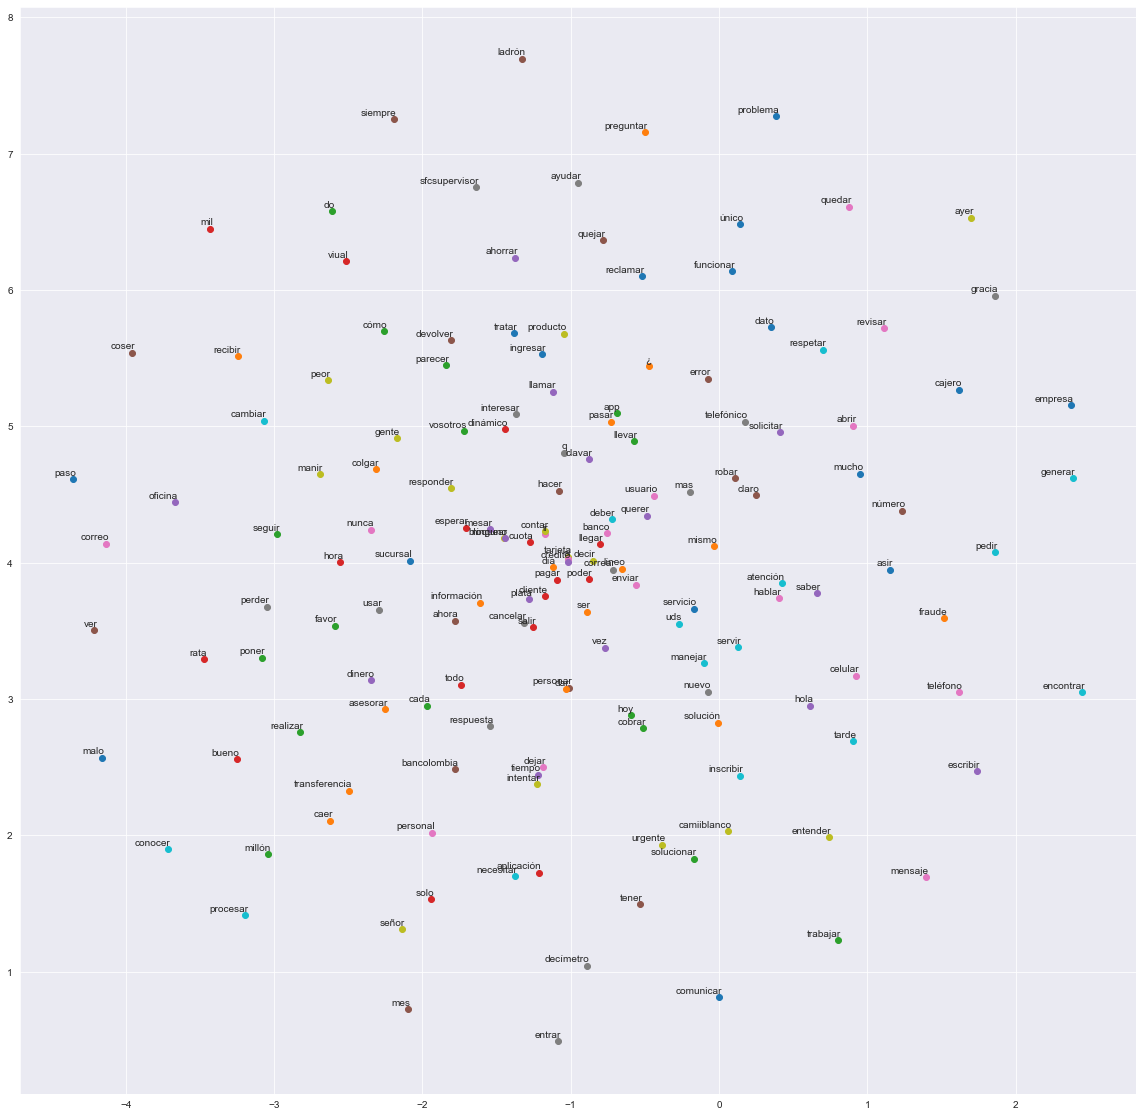

In [109]:
tsne_plot(w2v_model,40,5000)

In [110]:
# First get the embeddings into a matrix
embedding_size=200
embeddings = np.zeros((len(w2v_model.wv.index2word), embedding_size))
for i in range(0, len(w2v_model.wv.index2word)):
    w = w2v_model.wv.index2word[i]
    embeddings[i] = w2v_model.wv[w]

In [111]:
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=500, random_state=101)
embeddings_2d_projection = svd.fit_transform(embeddings)

In [115]:
n_clusters = 6
embedding_cluster_model = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings)

In [116]:
centroid_embedding_nearest_words = []
for centroid_embedding in embedding_cluster_model.cluster_centers_:
    centroid_embedding_nearest_words.append(
        np.argsort([i[0] for i in cdist(embeddings, np.array([centroid_embedding]), "euclidean")])[0:10]
    )

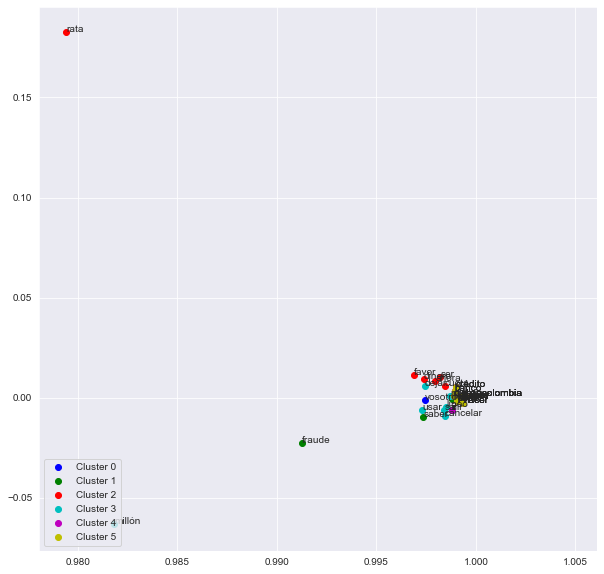

In [117]:
plt.figure(figsize=(10,10))
colors = itertools.cycle(["b","g","r","c","m","y","k","w"])
c = 0
for word_indices in centroid_embedding_nearest_words:
    clr = next(colors)
    plt.scatter(
        embeddings_2d_projection[word_indices,0],
        embeddings_2d_projection[word_indices,1],
        color=clr,
        label="Cluster " + str(c)
    )
    for ix in word_indices:
        x, y = embeddings_2d_projection[ix,:]
        plt.annotate(w2v_model.wv.index2word[ix], (x, y))
    c+=1
plt.legend(loc='lower left')
plt.show()


In [118]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 200), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 200 to 12 dimensions with PCA
    reduc = PCA(n_components=12).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                         'words': word_labels,
                        'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

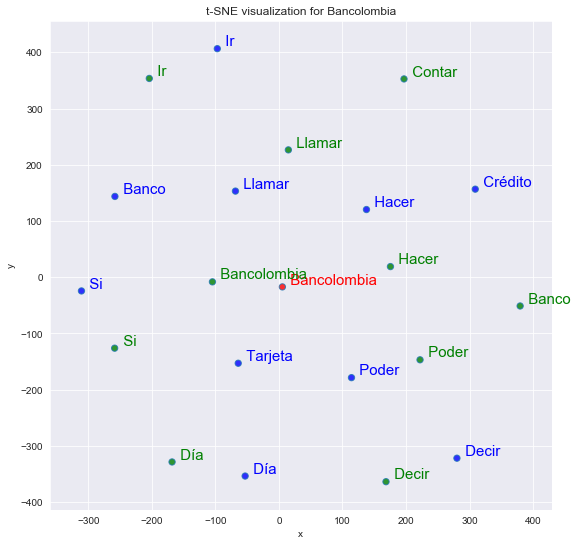

In [120]:
tsnescatterplot(w2v_model, 'bancolombia', sorted(word_freq, key=word_freq.get, reverse=True)[:10])

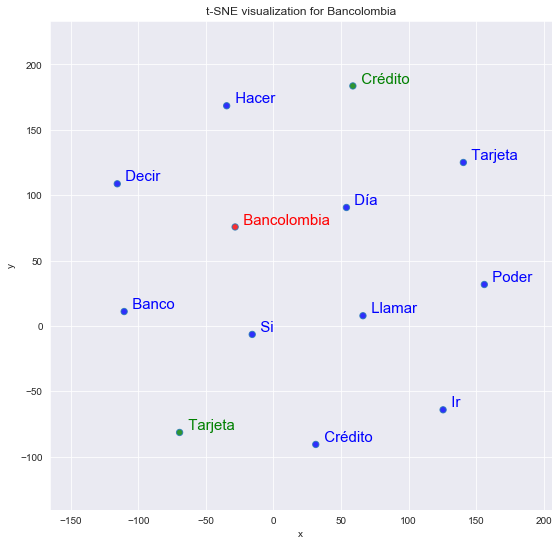

In [121]:
tsnescatterplot(w2v_model, 'bancolombia', ['crédito','tarjeta'])

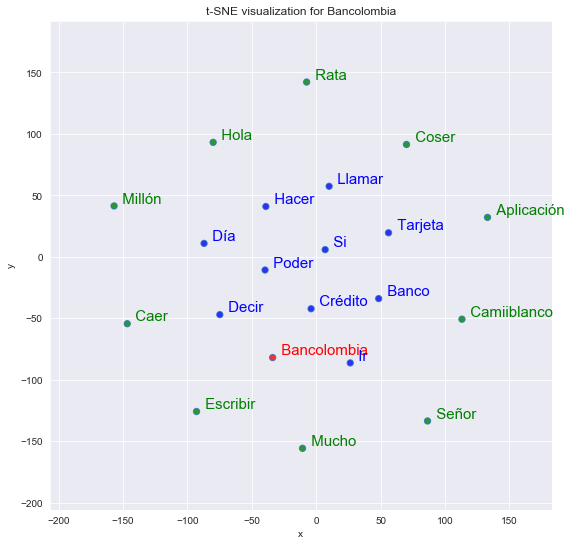

In [122]:
tsnescatterplot(w2v_model, 'bancolombia', [i[0] for i in w2v_model.wv.most_similar(negative=['bancolombia'])])

In [123]:
w2v_model


In [125]:
w2v_model.wv.most_similar(negative=['bancolombia'])

[('rata', -0.9795188903808594),
 ('millón', -0.9820974469184875),
 ('señor', -0.9828618764877319),
 ('aplicación', -0.983456552028656),
 ('caer', -0.9849354028701782),
 ('mucho', -0.9863840341567993),
 ('escribir', -0.9869028925895691),
 ('camiiblanco', -0.988755464553833),
 ('coser', -0.988924503326416),
 ('hola', -0.9891846179962158)]

In [135]:
w2v_model['bancolombia']

C:\Users\Alejandra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01376943, -0.10588673,  0.00231952,  0.0680886 ,  0.05973279,
       -0.06863935, -0.0405013 ,  0.10084618, -0.01472325, -0.03976892,
        0.03234655,  0.08519609, -0.12956303, -0.10026927, -0.03369917,
        0.0427561 ,  0.02255229, -0.04379371,  0.14265566, -0.04288892,
        0.05086881, -0.00707587, -0.02051871, -0.11248018, -0.02124384,
       -0.02823522, -0.01540382, -0.03176116,  0.01057439,  0.10961828,
        0.02056861,  0.06595049,  0.03190579,  0.0349962 , -0.01655071,
        0.06525255,  0.04978951,  0.02832254, -0.01262778,  0.11278672,
        0.01577274,  0.00997251, -0.02067867,  0.06524082, -0.04214733,
        0.04777179,  0.00042217, -0.01102107, -0.03867663,  0.01735885,
        0.10599993,  0.04120113,  0.06919897, -0.01764058, -0.10734632,
        0.02382982, -0.01581379,  0.11150691,  0.01474458,  0.05681204,
       -0.03757   , -0.02411364,  0.074397  ,  0.06920892, -0.08143333,
        0.00252915,  0.01622935,  0.00717168, -0.00608593,  0.03

In [136]:
type(w2v_model)

gensim.models.word2vec.Word2Vec